# Train and test AVIDNet

In [1]:
import torch
import os
from torchsummary import summary
from collections import defaultdict

from datasets.utils import get_data_transforms, separate_datasets, get_data_loaders, show_samples
from models.model import get_model
from models.train import train_model
from models.metrics import update_mean_metrics, print_metrics

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Load data

In [3]:
fold = 5
labeled_num_per_cls, mu = 25, 4
batch_size = 6
data_dir = 'data/CXR/train-test'
lb_partial_dir = 'train_lb/train_lb_'
dataset_types = ['train', 'test'] # ['train', 'val', 'test']

{'train_lb': 75, 'train_ulb': 300, 'train_ulb_wa': 300, 'test': 1582}


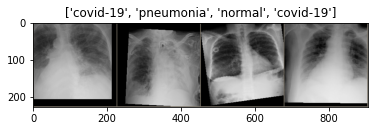

In [4]:
data_transforms = get_data_transforms(purpose='fixaug3')
data_loaders, dataset_sizes, class_names = get_data_loaders(data_transforms, fold, batch_size, dataset_types,
                                                            data_dir, lb_partial_dir, purpose='fixaug3', mu=mu)
print(dataset_sizes)
show_samples(data_loaders, class_names, dataset_type='train_lb')

## Train the model

In [5]:
trained_models = []
cls_names = ['All', 'COVID-19', 'Pneumonia', 'Normal']
metric_types = ['acc'] # metric_types = ['acc', 'ppv', 'recall', 'f1']
mean_metrics = {m_type: defaultdict(float) for m_type in metric_types}
for i in range(fold):
    model_ft, criterion, optimizer_ft, exp_lr_scheduler = get_model(device, fine_tuning=False)
    model, metrics = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, i, cls_names,
                                 metric_types, dataset_types, data_loaders, dataset_sizes, device, num_epochs=20,
                                 lambda_u=1.0, threshold=0.95, purpose='fixmatch')
    trained_models.append(model)
    mean_metrics = update_mean_metrics(cls_names, mean_metrics, metrics, status='training')

mean_metrics = update_mean_metrics(cls_names, mean_metrics, status='final', fold=fold)
print_metrics(mean_metrics, cls_names, phase='Mean results')

--------------------
Model 1
--------------------

Epoch 0/19
----------
[train]
LOSS - 1.0929
ACC - All: 0.3067  COVID-19: 0.4000  Pneumonia: 0.1200  Normal: 0.4000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.0027
ACC - All: 0.3755  COVID-19: 0.0000  Pneumonia: 0.0000  Normal: 1.0000 

Validation loss decreased (inf --> 1.002712).

Epoch 1/19
----------
[train]
LOSS - 1.1866
ACC - All: 0.3600  COVID-19: 0.3600  Pneumonia: 0.4800  Normal: 0.2400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.2906
ACC - All: 0.3780  COVID-19: 0.0485  Pneumonia: 0.0000  Normal: 0.9983 

EarlyStopping counter: 1 out of 5

Epoch 2/19
----------
[train]
LOSS - 0.9569
ACC - All: 0.5333  COVID-19: 0.3200  Pneumonia: 0.5600  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7898
ACC - All: 0.7339  COVID-19: 0.3495  Pneumonia: 0.6667  Normal: 0.9007 

Validation loss decreased (1.002712 --> 0.789802).

Epoch 3/19
----------
[train]
LOSS - 0.7954
ACC - All: 0.6667  COVID-19: 0.6800  Pneumonia: 

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4oc9n6m3'


[train]
LOSS - 0.7432
ACC - All: 0.7333  COVID-19: 0.8400  Pneumonia: 0.4000  Normal: 0.9600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.8776
ACC - All: 0.5594  COVID-19: 0.2524  Pneumonia: 0.3051  Normal: 0.9916 

EarlyStopping counter: 2 out of 5

Epoch 8/19
----------
[train]
LOSS - 0.6555
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5794
ACC - All: 0.7819  COVID-19: 0.2524  Pneumonia: 0.7616  Normal: 0.9040 

EarlyStopping counter: 3 out of 5

Epoch 9/19
----------
[train]
LOSS - 0.7683
ACC - All: 0.6667  COVID-19: 0.6800  Pneumonia: 0.6000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5816
ACC - All: 0.7769  COVID-19: 0.2524  Pneumonia: 0.7458  Normal: 0.9141 

EarlyStopping counter: 4 out of 5

Epoch 10/19
----------
[train]
LOSS - 0.6838
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 0.9583333320

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-mw_9jeju'


[train]
LOSS - 1.0207
ACC - All: 0.4933  COVID-19: 0.4800  Pneumonia: 0.5600  Normal: 0.4400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.9701
ACC - All: 0.4899  COVID-19: 0.3786  Pneumonia: 0.1887  Normal: 0.9579 

EarlyStopping counter: 1 out of 5

Epoch 2/19
----------
[train]
LOSS - 0.8541
ACC - All: 0.6533  COVID-19: 0.6800  Pneumonia: 0.6000  Normal: 0.6800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7028
ACC - All: 0.7781  COVID-19: 0.1845  Pneumonia: 0.8102  Normal: 0.8333 

Validation loss decreased (0.968159 --> 0.702845).

Epoch 3/19
----------
[train]
LOSS - 0.7340
ACC - All: 0.7867  COVID-19: 0.8800  Pneumonia: 0.6800  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6248
ACC - All: 0.7446  COVID-19: 0.0874  Pneumonia: 0.9661  Normal: 0.5286 

Validation loss decreased (0.702845 --> 0.624800).

Epoch 4/19
----------
[train]
LOSS - 0.9051
ACC - All: 0.5600  COVID-19: 0.7200  Pneumonia: 0.3600  Normal: 0.6000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS -

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-efsbgpg0'


[train]
LOSS - 0.6851
ACC - All: 0.7200  COVID-19: 0.8000  Pneumonia: 0.6400  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5826
ACC - All: 0.7686  COVID-19: 0.1748  Pneumonia: 0.7638  Normal: 0.8788 

EarlyStopping counter: 3 out of 5

Epoch 11/19
----------
[train]
LOSS - 0.5301
ACC - All: 0.8667  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5373
ACC - All: 0.7845  COVID-19: 0.1456  Pneumonia: 0.8271  Normal: 0.8316 

EarlyStopping counter: 4 out of 5

Epoch 12/19
----------
[train]
LOSS - 0.6498
ACC - All: 0.8533  COVID-19: 0.9200  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5594
ACC - All: 0.7863  COVID-19: 0.1650  Pneumonia: 0.8147  Normal: 0.8519 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.7863  COVID-19: 0.1650  Pneumonia: 0.8147  Normal: 0.8519 

Training complete in

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-oiplxdfb'


[train]
LOSS - 0.6275
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.9200  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5830
ACC - All: 0.7813  COVID-19: 0.2039  Pneumonia: 0.7718  Normal: 0.8956 

EarlyStopping counter: 2 out of 5

Epoch 11/19
----------
[train]
LOSS - 0.6207
ACC - All: 0.8000  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5966
ACC - All: 0.7661  COVID-19: 0.2039  Pneumonia: 0.7356  Normal: 0.9091 

EarlyStopping counter: 3 out of 5

Epoch 12/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-3ozfb9bh'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7220
ACC - All: 0.7467  COVID-19: 0.6800  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5872
ACC - All: 0.7933  COVID-19: 0.3592  Pneumonia: 0.7785  Normal: 0.8906 

EarlyStopping counter: 4 out of 5

Epoch 13/19
----------
[train]
LOSS - 0.6658
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5813
ACC - All: 0.7762  COVID-19: 0.1845  Pneumonia: 0.7650  Normal: 0.8956 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.7762  COVID-19: 0.1845  Pneumonia: 0.7650  Normal: 0.8956 

Training complete in 10m 48s
-------------------- 

--------------------
Model 4
--------------------

Epoch 0/19
----------
[train]
LOSS - 1.1281
ACC - All: 0.3600  COVID-19: 0.1600  Pneumonia: 0.6400  Normal: 0.2800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.0805
ACC - All: 0.3976  COVID-19: 0.2718  Pneu

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-clbiywdi'


[train]
LOSS - 0.7252
ACC - All: 0.7333  COVID-19: 0.8000  Pneumonia: 0.6800  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5816
ACC - All: 0.7857  COVID-19: 0.2427  Pneumonia: 0.8237  Normal: 0.8232 

Validation loss decreased (0.614160 --> 0.581557).

Epoch 9/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-_o2yhf4t'


[train]
LOSS - 0.5748
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6048
ACC - All: 0.7661  COVID-19: 0.2718  Pneumonia: 0.7480  Normal: 0.8788 

EarlyStopping counter: 1 out of 5

Epoch 10/19
----------
[train]
LOSS - 0.7518
ACC - All: 0.7200  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.6800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5893
ACC - All: 0.7630  COVID-19: 0.1748  Pneumonia: 0.7525  Normal: 0.8805 

EarlyStopping counter: 2 out of 5

Epoch 11/19
----------
[train]
LOSS - 0.6846
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5666
ACC - All: 0.7901  COVID-19: 0.2524  Pneumonia: 0.8237  Normal: 0.8333 

Validation loss decreased (0.581557 --> 0.566563).

Epoch 12/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-rywu3d9q'


[train]
LOSS - 0.5223
ACC - All: 0.8667  COVID-19: 0.9200  Pneumonia: 0.8800  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5789
ACC - All: 0.7870  COVID-19: 0.2621  Pneumonia: 0.8124  Normal: 0.8401 

EarlyStopping counter: 1 out of 5

Epoch 13/19
----------
[train]
LOSS - 0.5839
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5889
ACC - All: 0.7781  COVID-19: 0.2136  Pneumonia: 0.7831  Normal: 0.8687 

EarlyStopping counter: 2 out of 5

Epoch 14/19
----------
[train]
LOSS - 0.5406
ACC - All: 0.8400  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5760
ACC - All: 0.7781  COVID-19: 0.2136  Pneumonia: 0.7842  Normal: 0.8670 

EarlyStopping counter: 3 out of 5

Epoch 15/19
----------
[train]
LOSS - 0.6922
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.95833333

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-cz83bbtr'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 1.2550
ACC - All: 0.3333  COVID-19: 0.0800  Pneumonia: 0.3600  Normal: 0.5600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.2236
ACC - All: 0.5594  COVID-19: 0.0097  Pneumonia: 0.9989  Normal: 0.0000 

Validation loss decreased (inf --> 1.223604).

Epoch 1/19
----------
[train]
LOSS - 1.1006
ACC - All: 0.4400  COVID-19: 0.4800  Pneumonia: 0.2000  Normal: 0.6400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7166
ACC - All: 0.7585  COVID-19: 0.0000  Pneumonia: 0.8181  Normal: 0.8013 

Validation loss decreased (1.223604 --> 0.716609).

Epoch 2/19
----------
[train]
LOSS - 1.0271
ACC - All: 0.5200  COVID-19: 0.4000  Pneumonia: 0.5600  Normal: 0.6000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6914
ACC - All: 0.7617  COVID-19: 0.2524  Pneumonia: 0.9537  Normal: 0.5640 

Validation loss decreased (0.716609 --> 0.691353).

Epoch 3/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-z6d499i1'


[train]
LOSS - 0.9091
ACC - All: 0.5333  COVID-19: 0.5600  Pneumonia: 0.6400  Normal: 0.4000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7675
ACC - All: 0.6106  COVID-19: 0.0000  Pneumonia: 0.4418  Normal: 0.9680 

EarlyStopping counter: 1 out of 5

Epoch 4/19
----------
[train]
LOSS - 0.8402
ACC - All: 0.6400  COVID-19: 0.7200  Pneumonia: 0.6400  Normal: 0.5600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5579
ACC - All: 0.7870  COVID-19: 0.0194  Pneumonia: 0.8972  Normal: 0.7559 

Validation loss decreased (0.691353 --> 0.557924).

Epoch 5/19
----------
[train]
LOSS - 0.8320
ACC - All: 0.6400  COVID-19: 0.6000  Pneumonia: 0.6400  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5469
ACC - All: 0.7933  COVID-19: 0.2330  Pneumonia: 0.8147  Normal: 0.8586 

Validation loss decreased (0.557924 --> 0.546943).

Epoch 6/19
----------
[train]
LOSS - 0.8358
ACC - All: 0.7067  COVID-19: 0.4800  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's r

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-dd8kz8j2'


[train]
LOSS - 0.5745
ACC - All: 0.8000  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.8800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5483
ACC - All: 0.7876  COVID-19: 0.2621  Pneumonia: 0.7932  Normal: 0.8704 

EarlyStopping counter: 3 out of 5

Epoch 9/19
----------
[train]
LOSS - 0.6958
ACC - All: 0.7600  COVID-19: 0.5600  Pneumonia: 0.9200  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5230
ACC - All: 0.7971  COVID-19: 0.2039  Pneumonia: 0.8316  Normal: 0.8485 

Validation loss decreased (0.546943 --> 0.522990).

Epoch 10/19
----------
[train]
LOSS - 0.7131
ACC - All: 0.7733  COVID-19: 0.6800  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5623
ACC - All: 0.7813  COVID-19: 0.2039  Pneumonia: 0.7695  Normal: 0.8990 

EarlyStopping counter: 1 out of 5

Epoch 11/19
----------
[train]
LOSS - 0.6152
ACC - All: 0.8267  COVID-19: 0.8800  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's r

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-oty1uise'


[train]
LOSS - 0.7890
ACC - All: 0.6667  COVID-19: 0.6000  Pneumonia: 0.6000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5517
ACC - All: 0.7826  COVID-19: 0.2136  Pneumonia: 0.7819  Normal: 0.8822 

EarlyStopping counter: 3 out of 5

Epoch 13/19
----------
[train]
LOSS - 0.6967
ACC - All: 0.7067  COVID-19: 0.7200  Pneumonia: 0.7200  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5306
ACC - All: 0.7901  COVID-19: 0.1650  Pneumonia: 0.8124  Normal: 0.8653 

EarlyStopping counter: 4 out of 5

Epoch 14/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-tt297f1p'


[train]
LOSS - 0.6149
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5203
ACC - All: 0.7977  COVID-19: 0.2427  Pneumonia: 0.8249  Normal: 0.8535 

Validation loss decreased (0.522990 --> 0.520259).

Epoch 15/19
----------
[train]
LOSS - 0.7017
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5107
ACC - All: 0.8059  COVID-19: 0.2524  Pneumonia: 0.8475  Normal: 0.8401 

Validation loss decreased (0.520259 --> 0.510731).

Epoch 16/19
----------
[train]
LOSS - 0.6191
ACC - All: 0.7600  COVID-19: 0.6400  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5557
ACC - All: 0.7781  COVID-19: 0.1748  Pneumonia: 0.7763  Normal: 0.8855 

EarlyStopping counter: 1 out of 5

Epoch 17/19
----------
[train]
LOSS - 0.7535
ACC - All: 0.7200  COVID-19: 0.6000  Pneumonia: 0.8000  Normal: 0.76

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-svqfhc10'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6155
ACC - All: 0.8267  COVID-19: 0.7200  Pneumonia: 0.9600  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5518
ACC - All: 0.7788  COVID-19: 0.1942  Pneumonia: 0.7785  Normal: 0.8805 

EarlyStopping counter: 3 out of 5

Epoch 19/19
----------
[train]
LOSS - 0.6375
ACC - All: 0.7467  COVID-19: 0.6400  Pneumonia: 0.8400  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5456
ACC - All: 0.7851  COVID-19: 0.2524  Pneumonia: 0.7853  Normal: 0.8771 

EarlyStopping counter: 4 out of 5


--------------------
[Best results]
ACC - All: 0.7851  COVID-19: 0.2524  Pneumonia: 0.7853  Normal: 0.8771 

Training complete in 14m 48s
-------------------- 

[Mean results]
ACC - All: 0.7827  COVID-19: 0.2175  Pneumonia: 0.7862  Normal: 0.8754 



### Save and load model

In [6]:
out_dir = 'trained_models/baseline'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
    
for i, model in enumerate(trained_models):
    torch.save(model, f'trained_models/baseline/baseline_model_with_fixmatch_aug3_{i}.pt')

In [7]:
trained_model = []
for i in range(fold):
    trained_models.append(torch.load(f'trained_models/baseline/baseline_model_with_fixmatch_aug3_{i}.pt'))
    
summary(trained_models[0], (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,